In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy import stats 

In [2]:
df = pd.read_csv("Retail-Store-Transactions.csv")
df.head()

,Date,Time,StoreID,Location,Product,Quantity,UnitPrice,PaymentType,TransactionID,Cashier,StoreManager,TimeOfDay,DayOfWeek,TotalPrice
0,2024-03-30,15:29,S3,Store C,Tablet,3,364.22,Gift Card,TX300000,C1,Noah,Afternoon,Saturday,1092.66
1,2023-03-16,16:53,S1,Store B,Printer,9,384.74,Online,TX300001,C5,Liam,Afternoon,Thursday,3462.66
2,2024-04-26,21:22,S9,Store B,Laptop,9,397.80,Debit Card,TX300002,C3,Liam,Evening,Friday,3580.20
3,2025-02-08,14:28,S9,Store C,Monitor,7,80.27,Online,TX300003,C2,Mia,Afternoon,Saturday,561.89
4,2024-06-17,20:00,S9,Store A,Monitor,10,214.03,Gift Card,TX300004,C1,Noah,Evening,Monday,2140.30


**Measures of Frequency**

In [4]:
#the number of transactions per store
transactions_per_store = df['StoreID'].value_counts()
transactions_per_store

StoreID
S8     209
S3     208
S9     207
S1     200
S6     199
S4     199
S7     197
S5     195
S2     194
S10    192
Name: count, dtype: int64

In [5]:
#the most frequently sold product
df['Product'].value_counts()

Product
Printer    308
Monitor    297
Tablet     292
Phone      291
Chair      273
Laptop     270
Desk       269
Name: count, dtype: int64

**Measures of Central Tendency**

In [6]:
#the mean, median, and mode for Quantity.
Quantity_mean = df['Quantity'].mean()
print(f"the mean of Quantity is: {Quantity_mean}")

Quantity_median = df['Quantity'].median()
print(f"the median of Quantity is: {Quantity_median}")

Quantity_mode = df['Quantity'].mode()
print(f"the mode of Quantity are: {Quantity_mode}")

the mean of Quantity is: 5.5285
the median of Quantity is: 6.0
the mode of Quantity are: 0    10
Name: Quantity, dtype: int64


In [20]:
#the mean, median, and mode for TotalPrice.
TotalPrice_mean = df['TotalPrice'].mean()
print(f"the mean of TotalPrice is: {TotalPrice_mean}")

TotalPrice_median = df['TotalPrice'].median()
print(f"the median of TotalPrice is: {TotalPrice_median}")

TotalPrice_mode = df['TotalPrice'].round(2).mode()
print(f"the mode of TotalPrice are: {TotalPrice_mode}")

the mean of TotalPrice is: 1103.821775
the median of TotalPrice is: 838.53
the mode of TotalPrice are: 0      170.00
1      171.40
2      201.06
3      202.72
4      313.04
5      354.54
6      377.20
7      528.08
8      579.18
9      731.40
10     805.84
11     910.05
12    1333.40
13    1602.80
14    1818.80
15    2073.36
16    2871.28
Name: TotalPrice, dtype: float64


In [18]:
#to check if the mode of total price is correct, and yes it is correct
test = df['TotalPrice'].value_counts()
test.head(10)

TotalPrice
170.00     2
731.40     2
528.08     2
202.72     2
171.40     2
1602.80    2
2073.36    2
1818.80    2
805.84     2
2871.28    2
Name: count, dtype: int64

In [22]:
#determine which PaymentType is most commonly used
most_PaymentType = df['PaymentType'].mode()
print(f"the most commonly used of payment is {most_PaymentType[0]}")

the most commonly used of payment is Debit Card


**Measures of Dispersion**

In [ ]:
df["UnitPrice"].quartalize()

In [9]:
#the range, variance, and standard deviation of UnitPrice 
UnitPrice_range = df['UnitPrice'].max() - df['UnitPrice'].min()
print(f"the range of UnitPrice is: {UnitPrice_range}")

UnitPrice_variance = df['UnitPrice'].var()
print(f"the variance of UnitPrice is: {UnitPrice_variance:.2f}")

UnitPrice_standard_deviation = df['UnitPrice'].std()
print(f"the standard deviation of UnitPrice is: {UnitPrice_standard_deviation:.2f}")

the range of UnitPrice is: 394.83
the variance of UnitPrice is: 13021.26
the standard deviation of UnitPrice is: 114.11


In [10]:
#the range, variance, and standard deviation of TotalPrice
TotalPrice_range = df['TotalPrice'].max() - df['TotalPrice'].min()
print(f"the range of TotalPrice is: {TotalPrice_range:.2f}")

TotalPrice_variance = df['TotalPrice'].var()
print(f"the variance of TotalPrice is: {TotalPrice_variance:.2f}")

TotalPrice_standard_deviation = df['TotalPrice'].std()
print(f"the standard deviation of TotalPrice is: {TotalPrice_standard_deviation:.2f}")

the range of TotalPrice is: 3991.66
the variance of TotalPrice is: 835173.82
the standard deviation of TotalPrice is: 913.88


**Measures of Position**

In [11]:
#the quartiles (Q1, Q2, Q3) for total price to classify transactions into low, medium, and high-value sales.
q1 = df['TotalPrice'].quantile(0.25) 
print(f"the first quantile: {q1}") 

q2 = df['TotalPrice'].quantile(0.50) 
print(f"the secound quantile: {q2}") 

q3 = df['TotalPrice'].quantile(0.75) 
print(f"the third quantile: {q3:.2f}") 

the first quantile: 364.8725
the secound quantile: 838.53
the third quantile: 1640.91


In [13]:
#the quartiles of Quantity
q1 = df['Quantity'].quantile(0.25)
print(f"the first quantile: {q1}")

q2 = df['Quantity'].quantile(0.50)
print(f"the secound quantile: {q2}")

q3 = df['Quantity'].quantile(0.75)
print(f"the third quantile: {q3:.2f}")


#the 90th percentile of Quantity
quartiles_90th = np.percentile(df['Quantity'], 90)
print(f"the 90th percentile of Quantity is: {quartiles_90th}")

the first quantile: 3.0
the secound quantile: 6.0
the third quantile: 8.00
the 90th percentile of Quantity is: 10.0


In [24]:
#the top 5 highest-value sales
highest_value_sales = df.sort_values(by = 'TotalPrice', ascending = False)
highest_value_sales['TotalPrice'][0:5]
# or  highest_value_sales['TotalPrice'].head(5)

222     3997.4
1019    3961.6
463     3949.1
1146    3934.4
339     3927.1
Name: TotalPrice, dtype: float64

**Outlier Detection**

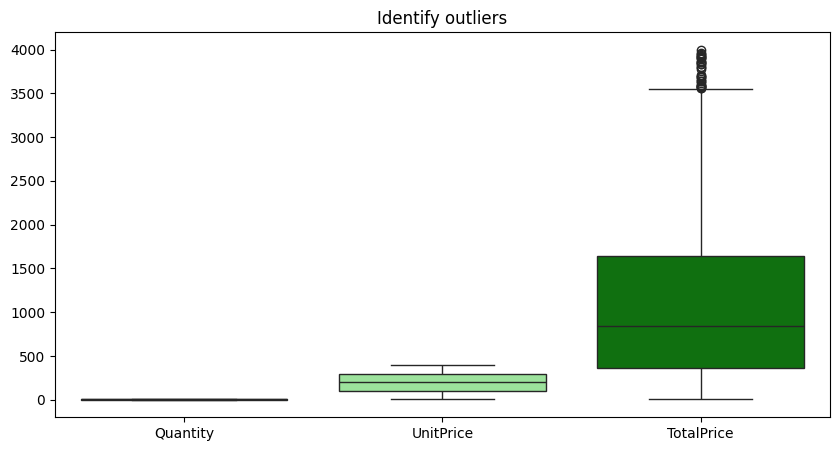

In [15]:
#Identify outliers to uncover unusual data points.
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, palette=["green", "lightgreen", 'green'])
plt.title("Identify outliers")
plt.show()

222     3997.4
339     3927.1
463     3949.1
489     3914.3
732     3906.2
1019    3961.6
1108    3862.1
1146    3934.4
1840    3888.0
1879    3855.2
1928    3856.1
1954    3914.2
Name: TotalPrice, dtype: float64


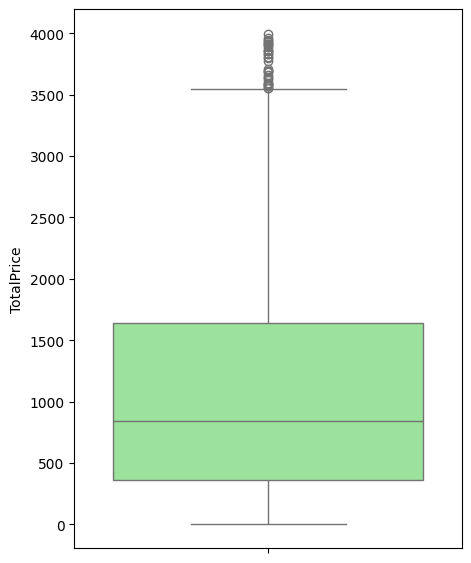

In [16]:
#the total price has many outliers
TotalPrice_zscore = np.abs(stats.zscore(df['TotalPrice'])) 
threshold = 3 
outliers_zscore = (TotalPrice_zscore > threshold) 
print(df.loc[outliers_zscore, 'TotalPrice']) 

plt.figure(figsize=(5, 7))
sns.boxplot(data=df['TotalPrice'], color = 'lightgreen')
plt.show()

**Analyzing Relationships Using Contingency Tables and Visualizations**

**Tables:**

In [17]:
#contingency tables to analyze the relationships
#Product cross PaymentType Table
Product_cross_PaymentType = pd.crosstab(index = df['Product'], columns = df['PaymentType'], margins = True)
print(Product_cross_PaymentType)

PaymentType  Cash  Credit Card  Debit Card  Gift Card  Online   All
Product                                                            
Chair          66           51          66         43      47   273
Desk           48           52          72         50      47   269
Laptop         44           61          58         52      55   270
Monitor        59           65          54         60      59   297
Phone          48           60          68         54      61   291
Printer        72           60          62         54      60   308
Tablet         62           61          57         52      60   292
All           399          410         437        365     389  2000


In [18]:
#contingency tables to analyze the relationships
# Location cross DayOfWeek table
Location_cross_DayOfWeek = pd.crosstab(index = df['Location'], columns =df['DayOfWeek'], margins = True)
print(Location_cross_DayOfWeek)

DayOfWeek  Friday  Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday  \
Location                                                                    
Store A        67      68        65      73        75       75         65   
Store B        70      80        62      67        77       61         82   
Store C        74      78        69      62        65       97         71   
Store D        76      79        62      72        79       68         61   
All           287     305       258     274       296      301        279   

DayOfWeek   All  
Location         
Store A     488  
Store B     499  
Store C     516  
Store D     497  
All        2000  


**visualizations:**

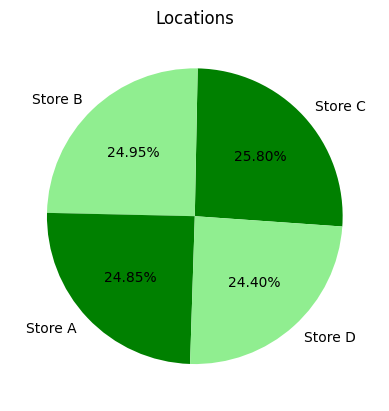

In [28]:
#pie chart

plt.pie(df["Location"].value_counts(), startangle=-4, autopct="%1.2f%%", labels=df["Location"].unique(), colors=["green","lightgreen","green","lightgreen"])
plt.title("Locations")
plt.show()

#The number of visits to "Store C" is the most, while the visits in "Store D" is the least.

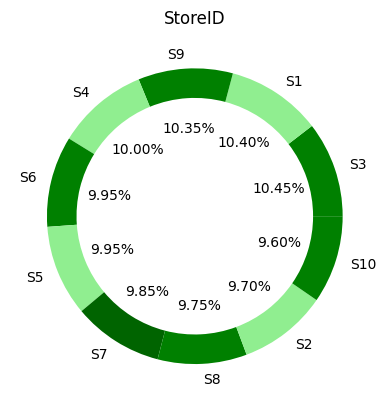

In [3]:
#doughnut chart

plt.pie(df["StoreID"].value_counts(), wedgeprops={'width':0.2}, autopct="%1.2f%%", labels=df["StoreID"].unique(), colors=["green","lightgreen","green","lightgreen","green","lightgreen","darkgreen"])
plt.title("StoreID")
plt.show()

#In the middle of the week, visits are few, while at the end of the week, visits are more.

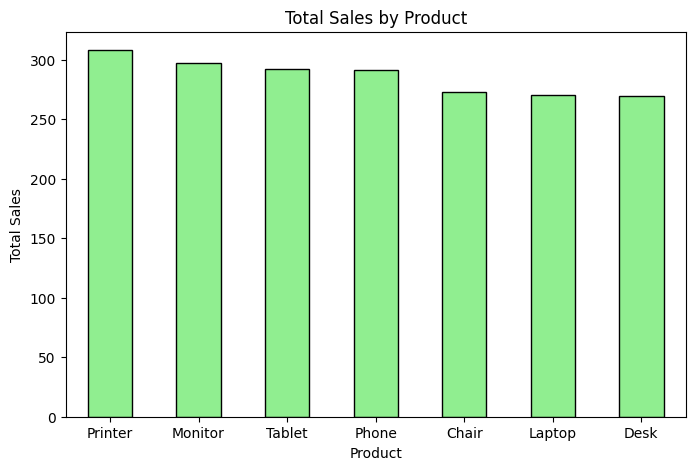

In [33]:
# Bar Chart
plt.figure(figsize=(8,5))
df['Product'].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')

plt.title("Total Sales by Product")
plt.ylabel("Total Sales")
plt.xlabel("Product") 
plt.xticks(rotation=0)
plt.show()
#The printer is the best selling and the disk is the least selling

C:\Users\PC\AppData\Local\Temp\ipykernel_21444\1936943506.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Time"]).dt.hour


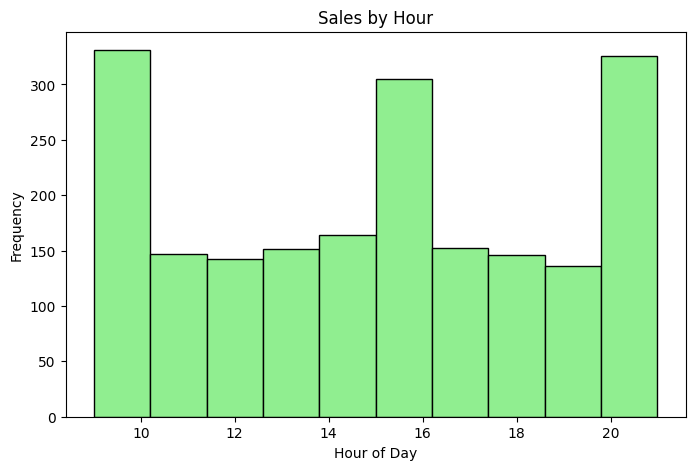

In [34]:
#histogram
df["Date"] = pd.to_datetime(df["Time"]).dt.hour
plt.figure(figsize=(8,5))
plt.hist(df["Date"], bins=10, color="lightgreen", edgecolor="black") 

plt.title("Sales by Hour")
plt.xlabel("Hour of Day") 
plt.ylabel("Frequency")
plt.show()
#The shop is active during the first and last hours of its working hours, as well as at midday.